        E:\Data\FinalResults\0809 - Lapwise Time in S1 is already existed!


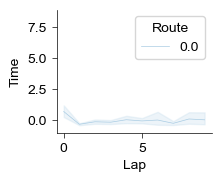

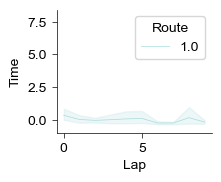

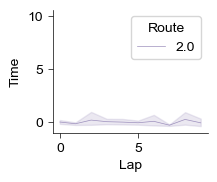

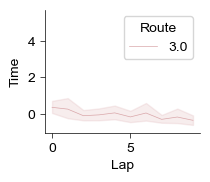

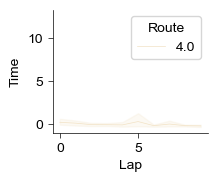

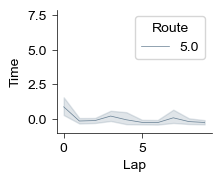

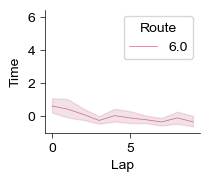

In [13]:
from mylib.statistic_test import *

code_id = '0809 - Lapwise Time in S1'
loc = os.path.join(figpath, code_id)
mkdir(loc)

if os.path.exists(join(figdata, code_id+'.pkl')):
    with open(join(figdata, code_id+'.pkl'), 'rb') as handle:
        Data = pickle.load(handle)
else:
    maze_indices = np.where((f2['MiceID'] != 10209))[0]
    Data = DataFrameEstablish(variable_names = ['Route', 'Lap', 'Time'], 
                              file_idx=maze_indices,
                              f = f2, function = LapwiseTimeImprovement_DSP_Interface, 
                              file_name = code_id, behavior_paradigm = 'DSPMaze')
Data['Time'] /= 1000

for r in range(7):
    idx = np.where(Data['Route'] == r)[0]
    Data['Time'][idx] = (Data['Time'][idx] - np.nanmean(Data['Time'][idx])) / np.nanstd(Data['Time'][idx])
    
    fig = plt.figure(figsize = (2,1.6))
    ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
    SubData = SubDict(Data, Data.keys(), np.where((Data['Route'] == r))[0])
    v_max = np.nanmax(np.abs(SubData['Time']))*1.1
    sns.lineplot(
        x='Lap',
        y='Time',
        data=SubData,
        hue='Route',
        ax=ax,
        palette=[DSPPalette[r]],
        linewidth=0.5
    )
    ax.set_ylim(-1, v_max)
    plt.show()